# Sprawozdanie 1
### Autorzy:
* inż. Marcin Bober 249426
* inż. Piotr Gorzelnik 248947
* inż. Wiktor Springer xxxxxx

## Aliasing 2D

Zniekształcenia powstają ze względu na rejestrowanie fragmentów obrazu w różnych chwilach czasu. Zanim cały obraz zostanie zarejestrowany, obiekt zdąży się przemieścić co zostanie uwiecznione jako zniekształcenie. Problem staje się tym dotkliwszy im wolniej skanujemy obraz. Rozwiązaniem jest rejestrowanie całego obrazu na raz. 

In [78]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# Sprawdzenie czy punkt jest w danym obszarze
def is_in_carbox(x, y, line_idx):
  carbox_y_start = camera_lines * line_idx - multiplier
  carbox_y_stop = camera_lines * (line_idx + 1) - multiplier
  return (x >= -multiplier and x < multiplier) and (y >= carbox_y_start and y < carbox_y_stop)

# Przejście z kartezjańskich do biegunowych
def cartesian(x, deg):
  return x * np.cos(deg), x * np.sin(deg)

# Generowanie linii
def gen_line(rotation, carbox_idx):
  x_passed, y_passed = [], []
  x, y = cartesian(fx(linspace, rotation) * multiplier, linspace)
  for i in range(x.size):
    if is_in_carbox(x[i], y[i], carbox_idx):
      x_passed.append(x[i])
      y_passed.append(y[i])
  return x_passed, y_passed

# Generowanie ramki
def gen_frame(rotation):
  x_frame, y_frame = [], []
  for carbox_idx in range(int(car_box_size)):
    x_passed, y_passed = gen_line(rotation+carbox_idx, carbox_idx)
    x_frame += x_passed
    y_frame += y_passed
    # print("carbox_idx: ", carbox_idx, "rotation: ", rotation)
    # ax.scatter(x_passed, y_passed, color='blue', s=1)
    # plt.pause(0.1)
  return x_frame, y_frame

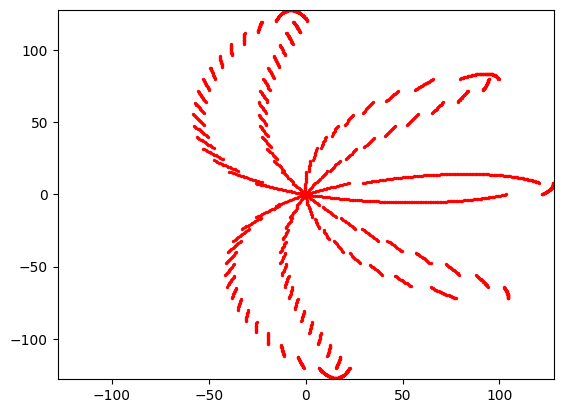

In [80]:
wings = 5
frame_size = 256
camera_lines = 8
frames = 64
multiplier = frame_size/2
car_box_size = frame_size / camera_lines
rotation = np.arange(-frames / 2, frames / 2, 1)
resolution = 2000

linspace = np.linspace(0, 2 * np.pi * multiplier, resolution)
fx = lambda x, m: np.sin(wings * x + (m * np.pi /10))

fig = plt.figure()
ax = fig.add_subplot()

for i in range(frames):
  ax.clear()
  ax.set_xlim(-multiplier, multiplier)
  ax.set_ylim(-multiplier, multiplier)
  x_frame, y_frame = gen_frame(rotation[i])
  ax.scatter(x_frame, y_frame, color='red', s=2)
  plt.pause(0.01)

plt.show()

### Interpolacja liniowa

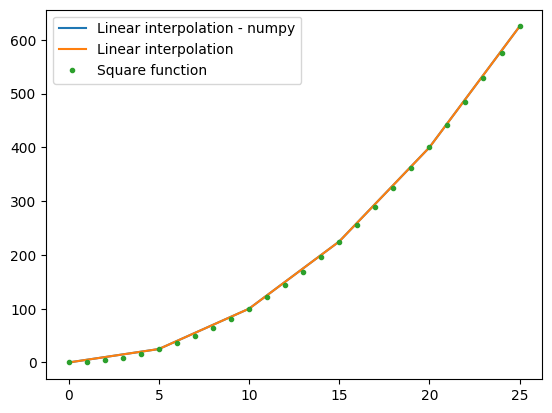

In [81]:
def square(x):
    return x**2

x_values = np.arange(26)
y_values = [square(x) for x in x_values]

interp_x = np.arange(0, 26, 5) # range of x values to interpolate at
interp_y_linear = []

# LINEAR
for x in interp_x:
    i = 0
    while i < len(x_values) - 1 and x > x_values[i+1]: # Find the two closest x values
        i += 1
        
    slope = (y_values[i+1] - y_values[i]) / (x_values[i+1] - x_values[i])
    y = y_values[i] + slope * (x - x_values[i])
    
    interp_y_linear.append(y)

interp_y_np_linear = np.interp(interp_x, x_values, y_values)

# LINEAR INTERPOLATION
plt.plot(interp_x, interp_y_np_linear, label='Linear interpolation - numpy')
plt.plot(interp_x, interp_y_linear, label='Linear interpolation')
plt.plot(x_values, y_values, '.', label='Square function')
plt.legend()
plt.show()

### Interpolacja metodą najbliższego sąsiada

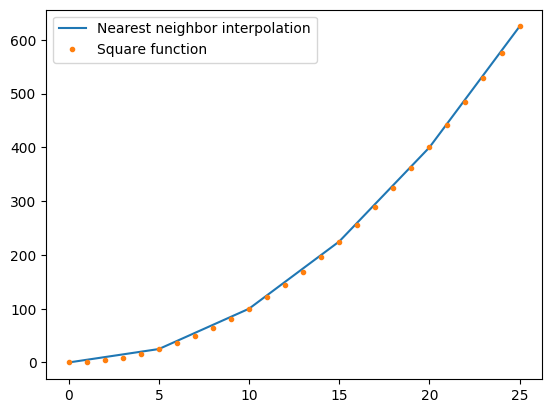

In [82]:
def square(x):
    return x**2

x_values = np.arange(26)
y_values = [square(x) for x in x_values]

interp_x = np.arange(0, 26, 5) # range of x values to interpolate at


# NEAREST NEIGHBOUR
interp_y_nn = []
for x in interp_x:
    # Find the index of the closest x value in x_values
    index = min(range(len(x_values)), key=lambda i: abs(x_values[i]-x))
    
    # Add the corresponding y value to the interp_y list
    interp_y_nn.append(y_values[index])


# NN INTERPOLATION
#plt.plot(interp_x, interp_y_np_nn, label='Nearest neighbor interpolation - numpy')
plt.plot(interp_x, interp_y_nn, label='Nearest neighbor interpolation')
plt.plot(x_values, y_values, '.', label='Square function')
plt.legend()
plt.show()

In [83]:
from PIL import Image
import numpy as np

bayer_array = np.array([    ['G', 'B'],
                            ['R', 'G']      ])

fuji_array = np.array([     ['G', 'B', 'R', 'G', 'R', 'B'],
                            ['R', 'G', 'G', 'B', 'G', 'G'],
                            ['B', 'G', 'G', 'R', 'G', 'G'],
                            ['G', 'R', 'B', 'G', 'B', 'R'],
                            ['B', 'G', 'G', 'R', 'G', 'G'],
                            ['R', 'G', 'G', 'B', 'G', 'G'],     ])

def to_mosaic(image, window):
    mosaic = image.copy()
    for i in range(0, image.shape[0]-window.shape[0]+1, window.shape[0]):       # dla każdego piksela w obrazie (wiersz)
        for j in range(0, image.shape[1]-window.shape[1]+1, window.shape[1]):   # dla każdego piksela w obrazie (kolumna)
            for k in range(window.shape[0]):                                    # dla każdego piksela w oknie (wiersz)
                for l in range(window.shape[1]):                                # dla każdego piksela w oknie (kolumna)
                    if window[k, l] == 'R':
                        mosaic[i+k, j+l, 1] = 0 # zerujemy G
                        mosaic[i+k, j+l, 2] = 0 # zerujemy B
                    elif window[k, l] == 'G':
                        mosaic[i+k, j+l, 0] = 0 # zerujemy R
                        mosaic[i+k, j+l, 2] = 0 # zerujemy B
                    elif window[k, l] == 'B':
                        mosaic[i+k, j+l, 0] = 0 # zerujemy R
                        mosaic[i+k, j+l, 1] = 0 # zerujemy G
    return mosaic


def to_demosaic(mosaic, window):
    demosaic = mosaic.copy()
    for i in range(0, mosaic.shape[0]-window.shape[0]+1, window.shape[0]):      # dla każdego piksela w obrazie (wiersz)
        for j in range(0, mosaic.shape[1]-window.shape[1]+1, window.shape[1]):  # dla każdego piksela w obrazie (kolumna)
            r, g, b = 0, 0, 0                                                   # sumy wartości pikseli w oknie
            r_count, g_count, b_count = 0, 0, 0                                 # liczniki pikseli w oknie
            for k in range(window.shape[0]):                                    # dla każdego piksela w oknie (wiersz)
                for l in range(window.shape[1]):                                # dla każdego piksela w oknie (kolumna)
                    # zliczanie liczby pikseli R, G, B do demozaiki
                    r_count += 1 if window[k, l] == 'R' else 0
                    g_count += 1 if window[k, l] == 'G' else 0
                    b_count += 1 if window[k, l] == 'B' else 0
                    # sumowanie wartości pikseli R, G, B do demozaiki
                    r += mosaic[i+k, j+l, 0]
                    g += mosaic[i+k, j+l, 1]
                    b += mosaic[i+k, j+l, 2]
            
            for k in range(window.shape[0]):                                   # dla każdego piksela w oknie (wiersz)
                for l in range(window.shape[1]):                               # dla każdego piksela w oknie (kolumna)
                  demosaic[i + k, j + l] = [r / r_count, g / g_count, b / b_count]  # demozaika (suma wartości / liczbe wystąpień, żeby nie wyszło poza zakres)
    return demosaic


def img_to_array(file):
    return np.asarray(Image.open(file))

def save_img(array, file):
    (Image.fromarray(array)).save(file)

def main():
    image = img_to_array('jan_pat.jpg')
    mosaic = to_mosaic(image, bayer_array)
    demosaic = to_demosaic(mosaic, bayer_array)

    save_img(mosaic, 'jan_pat_mosaic.png')
    save_img(demosaic, 'jan_pat_demosaic.png')

main()

### Obraz wejściowy

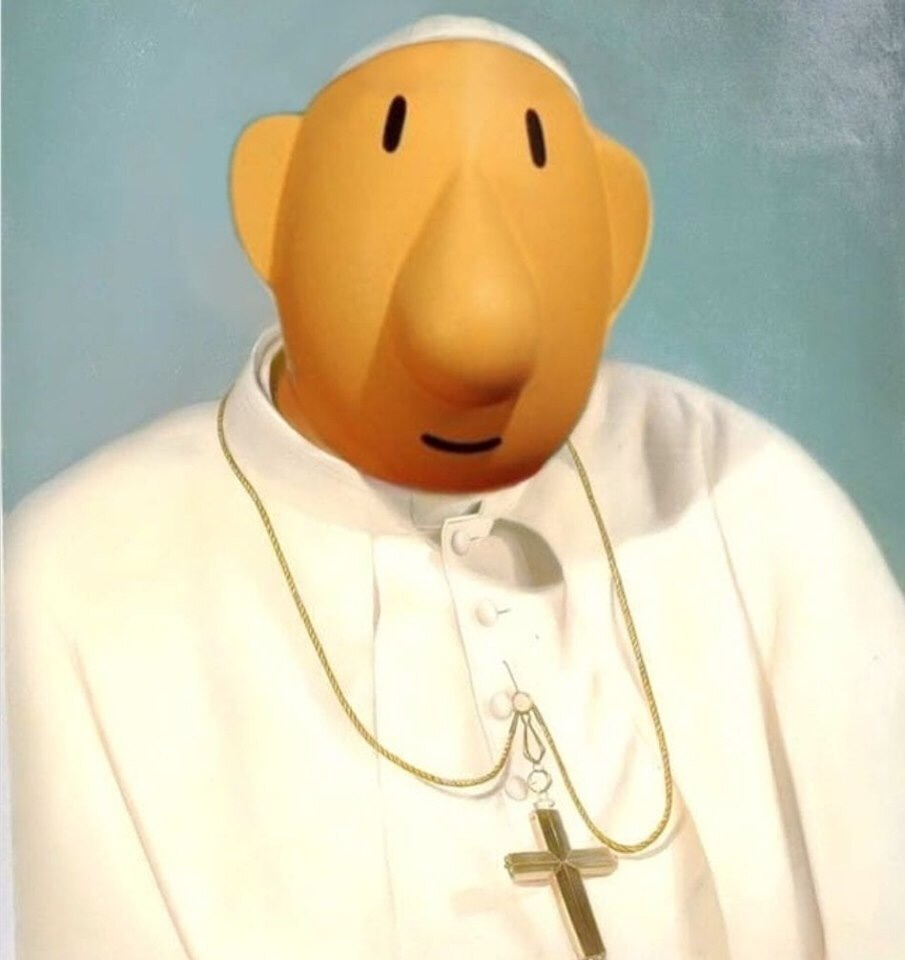

In [84]:
from IPython import display
display.Image("jan_pat.jpg")

### Obraz po mozajkowaniu

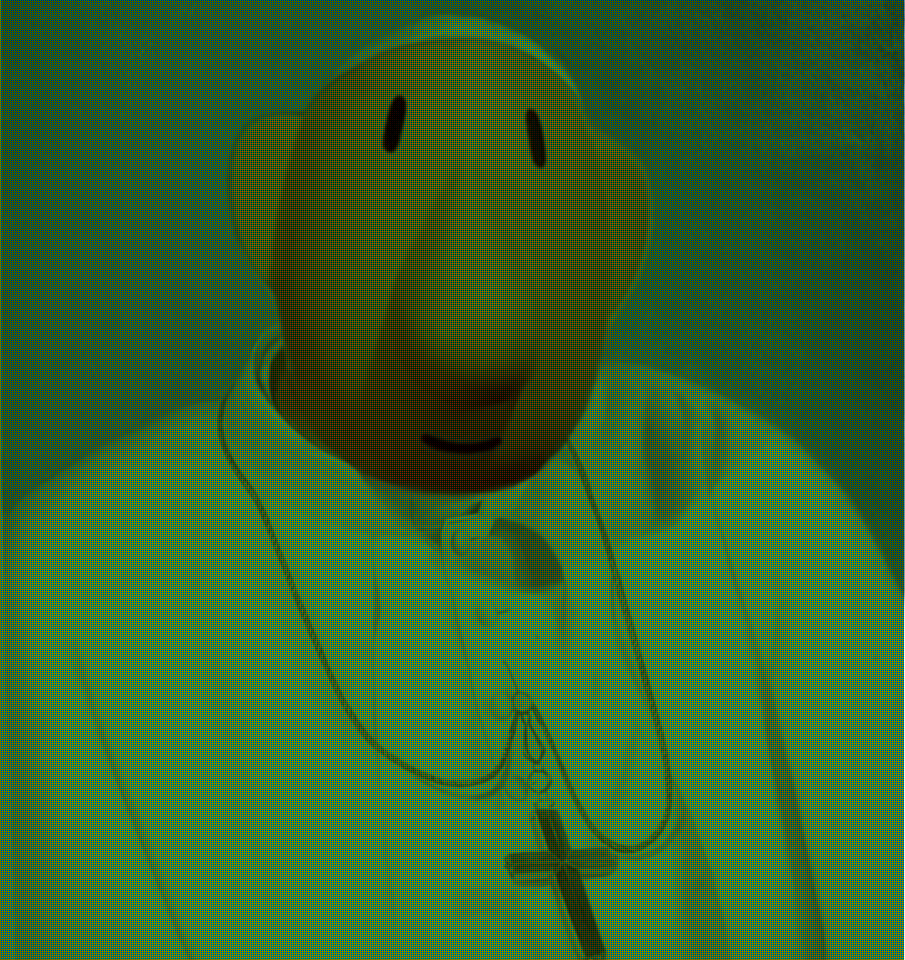

In [85]:
display.Image("jan_pat_mosaic.png")

### Obraz po demozajkowaniu

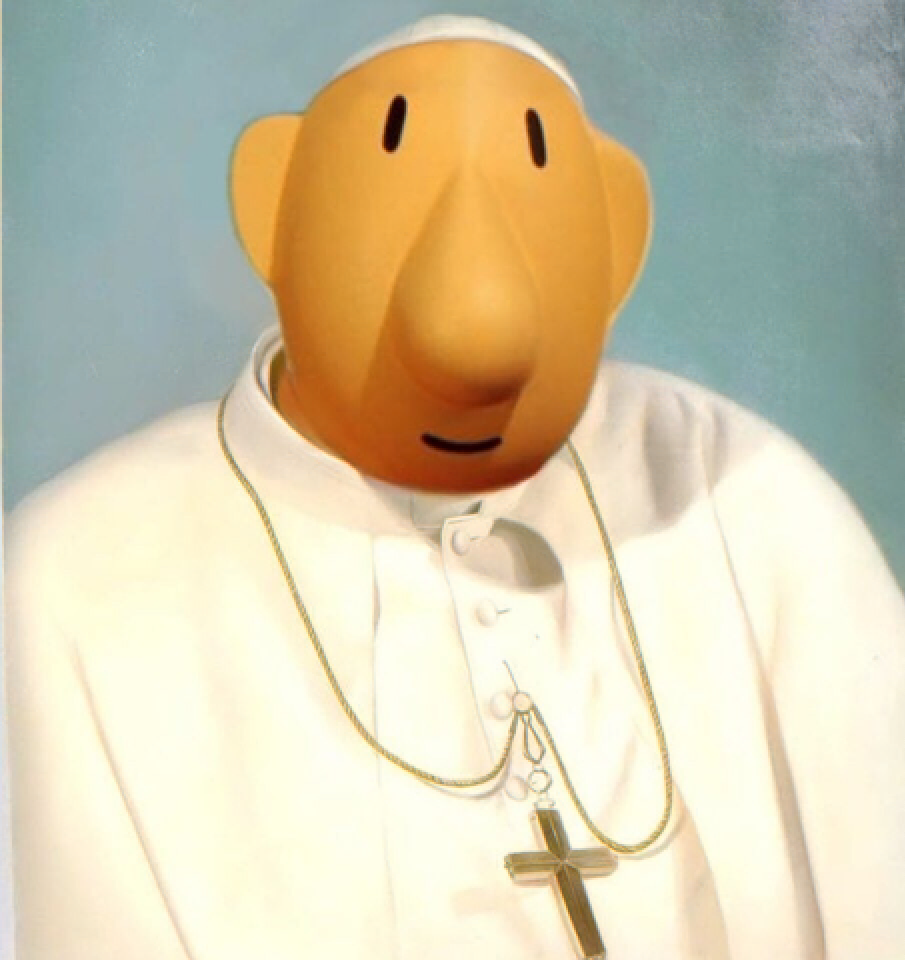

In [86]:
display.Image("jan_pat_demosaic.png")